## Problem Statement: Predict Employeee Churn

### Exploratory Data Analysis

#### 1. Descriptive Statistics

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path_to_data = './data/hr_employee_churn_data.csv'
df = pd.read_csv(path_to_data)
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [7]:
df.shape

(14999, 10)

In [8]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df['Work_accident'].unique()

array([0, 1])

In [11]:
df['promotion_last_5years'].unique()

array([0, 1])

* 'Work Accident', 'Promotion Last 5 Years' and 'Salary' are Categorical Values

#### 2. Examine Target Variable - "Left"

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\2572539050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=df, palette='Set2')


[]

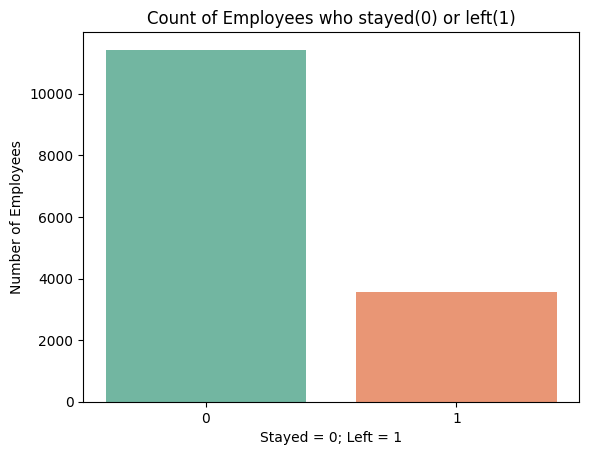

In [17]:
# Check Employee Range based on Target Column: Left
# palette is optional
sns.countplot(x='left', data=df, palette='Set2') 

# These are optional:
plt.title('Count of Employees who stayed(0) or left(1)')
plt.xlabel('Stayed = 0; Left = 1')
plt.ylabel('Number of Employees')
plt.plot()

* In the training set, moore stayed than left... seems to be an imbalance

#### 3. Examine Individual Features

* 3a. Examine Categorical Values

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\456487748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='salary', data=df, palette='Set2')


[]

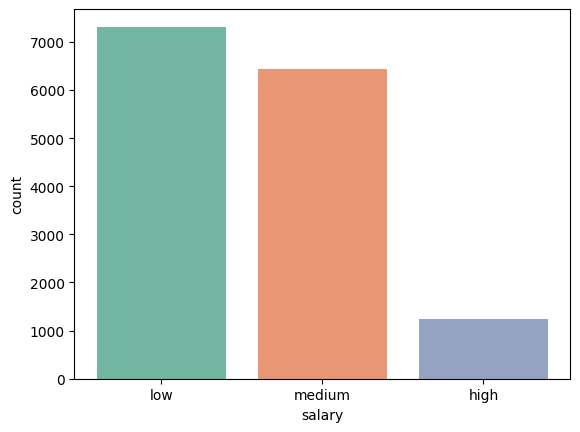

In [18]:
# feature: 'salary
sns.countplot(x='salary', data=df, palette='Set2')
plt.plot()

* most employees are have either low or medium salary

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\701098015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='left', col='salary', kind='count', data=df, palette='Set2' )


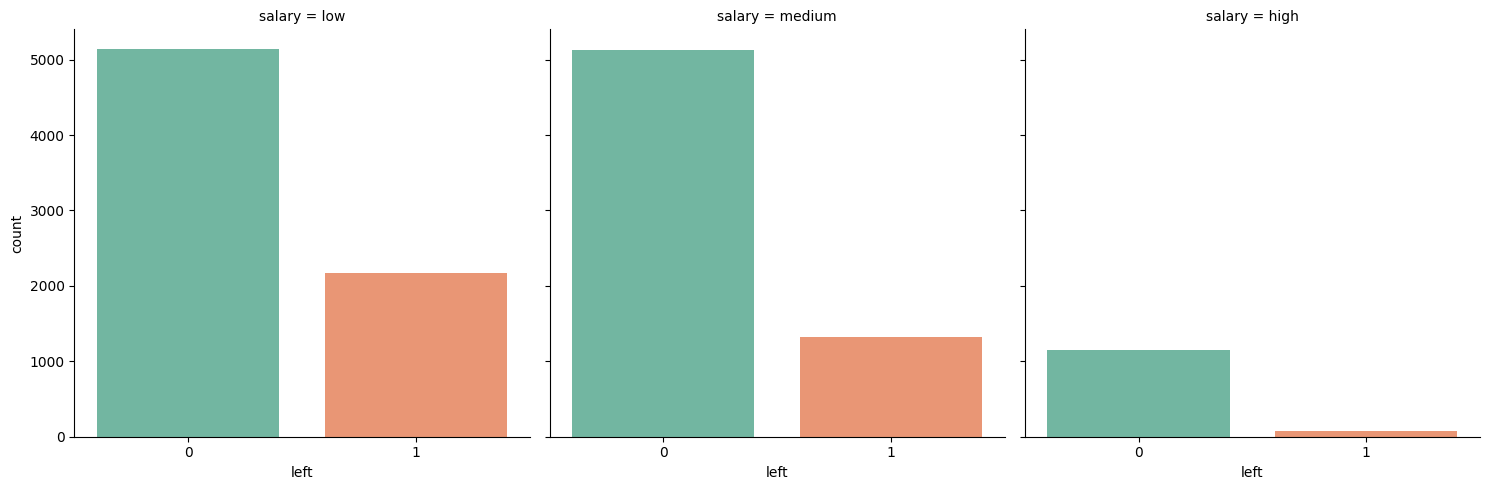

In [23]:
# feature left: split over feature salary
sns.catplot(x='left', col='salary', kind='count', data=df, palette='Set2' )

* low and medium salary employees have high churning rate

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\896978516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='promotion_last_5years', data=df, palette="Set2")


[]

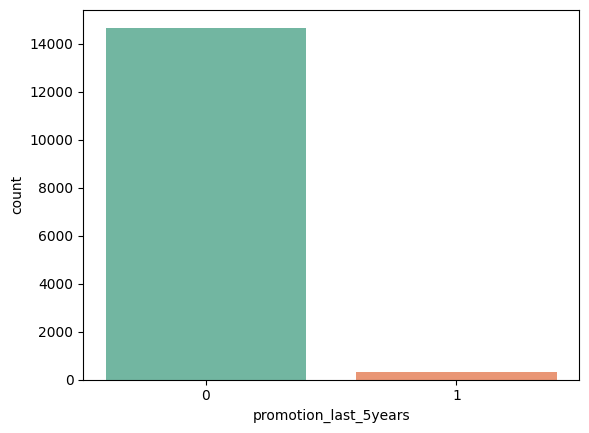

In [20]:
# feature: 'promotion_last_5_years'
sns.countplot(x='promotion_last_5years', data=df, palette="Set2")
plt.plot()

* non-promoted employee count is very high

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\1063009203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='left', col='promotion_last_5years', kind='count', data=df, palette='Set2')


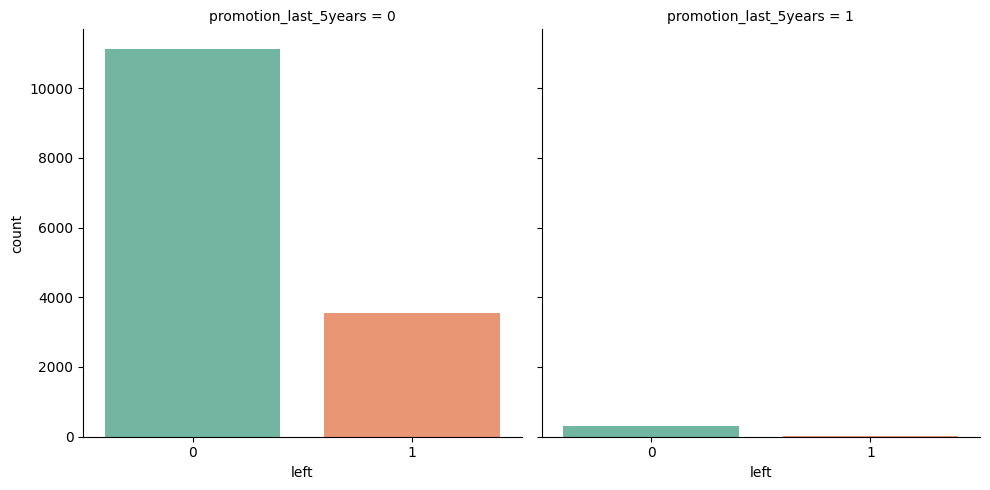

In [26]:
# feature: left split over 'promotion_last_5years'
from itertools import count


sns.catplot(x='left', col='promotion_last_5years', kind='count', data=df, palette='Set2')

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\4236942448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Work_accident', data=df, palette='Set2')


[]

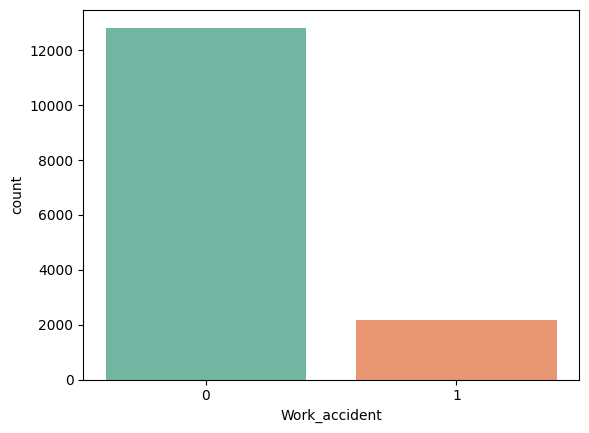

In [21]:
# feature: 'Work_accident'
sns.countplot(x='Work_accident', data=df, palette='Set2')
plt.plot()

* Few employees met with an accident

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\807363868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='left', col='Work_accident', kind='count', data=df, palette='Set2')


[]

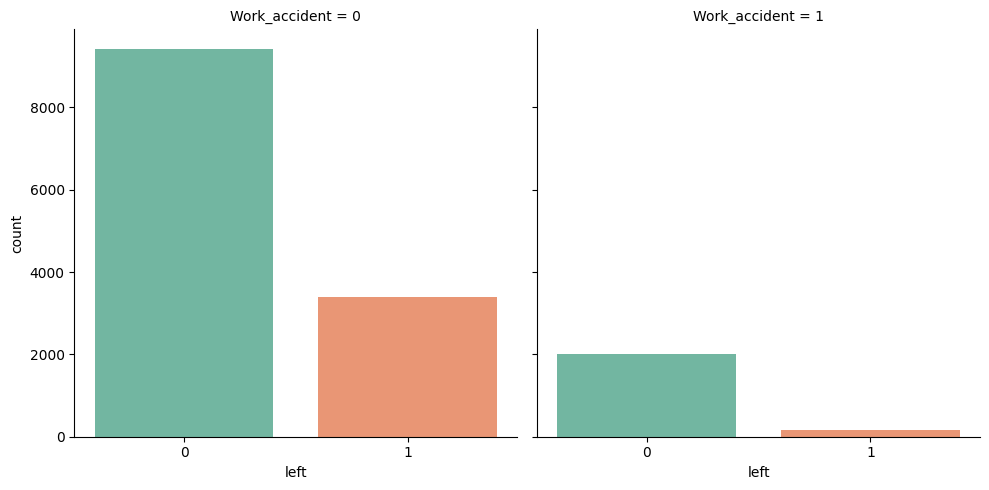

In [34]:
# feature: 'left' split over 'Work_accident'
sns.catplot(x='left', col='Work_accident', kind='count', data=df, palette='Set2')
plt.plot()

* 3b. Examine Numerical Variables

[]

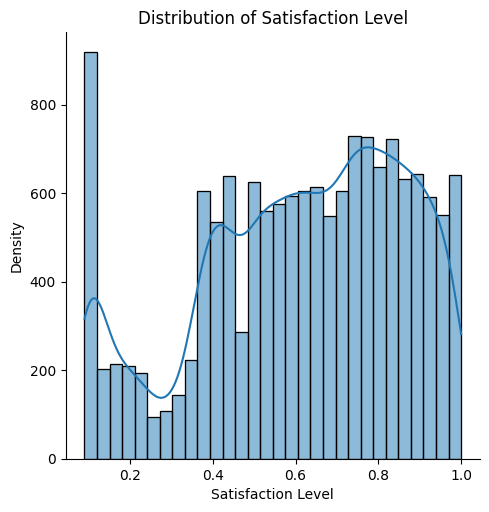

In [35]:
# feature: satisfaction_level
sns.displot(df['satisfaction_level'], kde=True)

plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')

plt.plot()

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\4261300491.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='satisfaction_level', data=df, palette='Set2')


<Axes: xlabel='left', ylabel='satisfaction_level'>

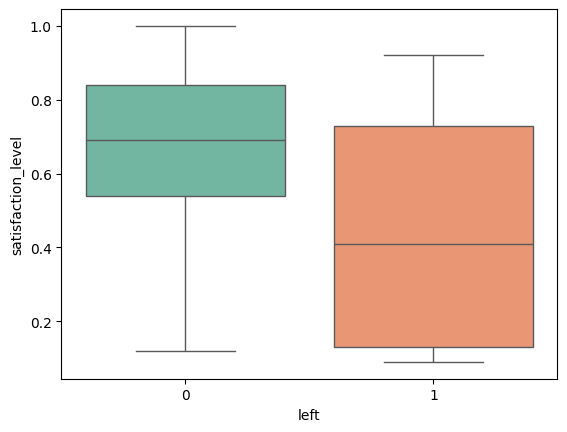

In [36]:
# use box plot to examine how numerical feature,'satisfaction level' affect categorical target variable, 'left'
sns.boxplot(x='left', y='satisfaction_level', data=df, palette='Set2')

* The box plot visually represents how the distribution of satisfaction_level varies across the different categories of left.
* employees with a lower satisfaction level of 0.2 to 0.5 have a higher churning rate

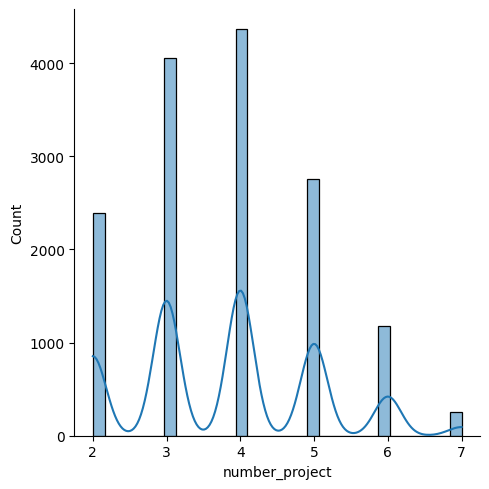

In [37]:
# feature: 'number_project'
sns.displot(df['number_project'], kde=True)

* number_project ranges fro 2 to 7, highest is 4

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\3122848450.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='number_project', data=df, palette='Set2')


<Axes: xlabel='left', ylabel='number_project'>

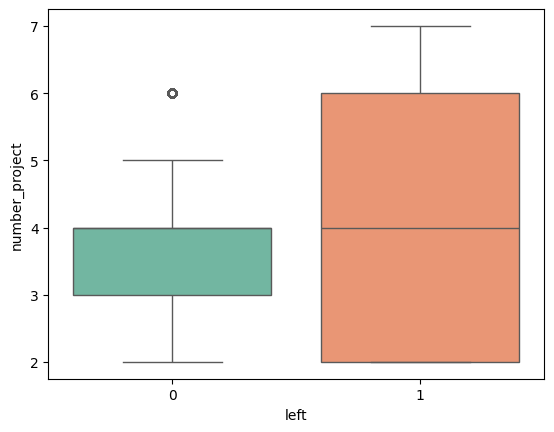

In [39]:
sns.boxplot(x='left', y='number_project', data=df, palette='Set2')

* Employees with 3-4 projects have a lower churn rate
* Employees with a lot of projects turn to leave

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\3077356652.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_evaluation'], kde=True)


<Axes: xlabel='last_evaluation', ylabel='Density'>

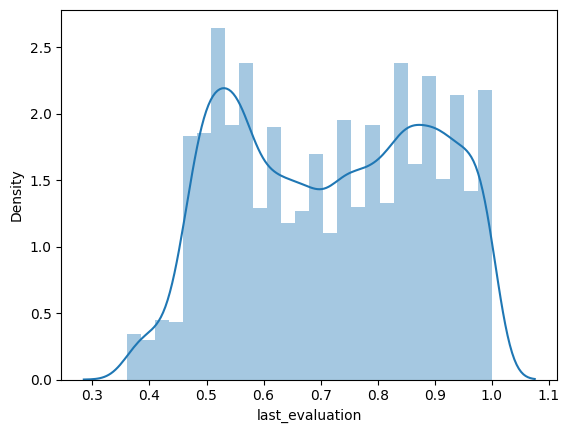

In [40]:
# feature: 'last_evaluation'ArithmeticError
sns.distplot(df['last_evaluation'], kde=True)

* 'last-evaluation' distributes from 0.35 to 1.o with a high of 0.5 

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\2279159769.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='last_evaluation', data=df, palette='Set2')


<Axes: xlabel='left', ylabel='last_evaluation'>

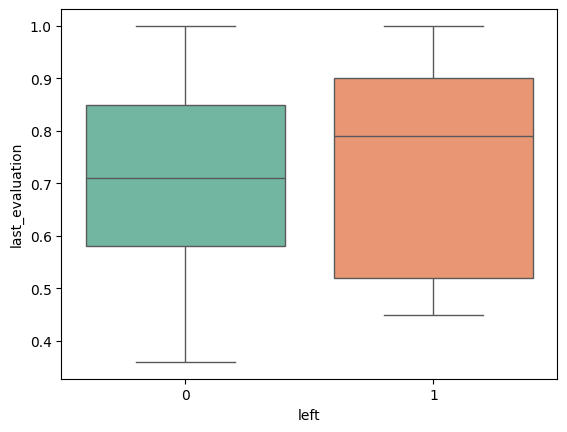

In [41]:
sns.boxplot(x='left', y='last_evaluation', data=df, palette='Set2')

* not much impact.. employees who left seems to have a high 'last_evaluation' value

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\230105613.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_montly_hours'], kde=True)


<Axes: xlabel='average_montly_hours', ylabel='Density'>

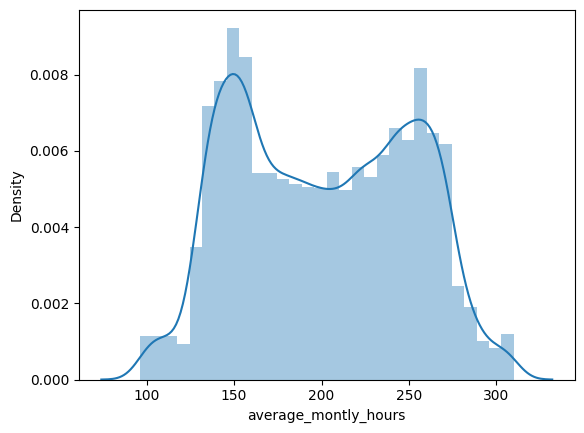

In [43]:
# feature: 'average_montly_hours'
sns.distplot(df['average_montly_hours'], kde=True)

* distributes from 100 to 300 with a high at around 150

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\2795156350.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='average_montly_hours', data=df, palette='Set2')


<Axes: xlabel='left', ylabel='average_montly_hours'>

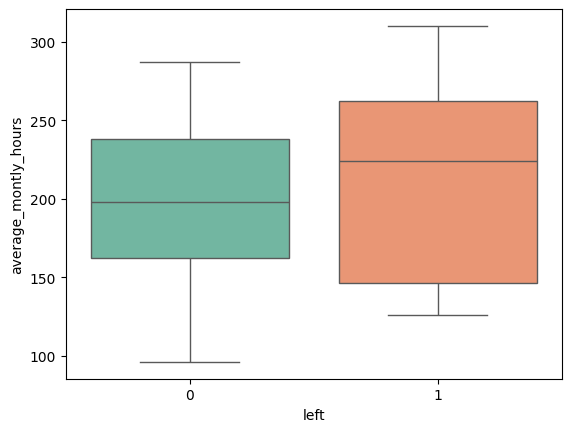

In [44]:
sns.boxplot(x='left', y='average_montly_hours', data=df, palette='Set2')

* employee left due to high 'average_montly_hours'

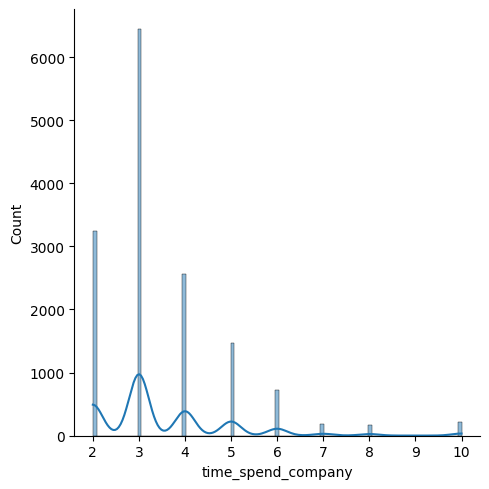

In [45]:
# feature: time_spend_company
sns.displot(df['time_spend_company'], kde=True)

* distributes from 2 to 10, with a high at 3

C:\Users\Sean\AppData\Local\Temp\ipykernel_16988\3351369365.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='time_spend_company', data=df, palette='Set2')


<Axes: xlabel='left', ylabel='time_spend_company'>

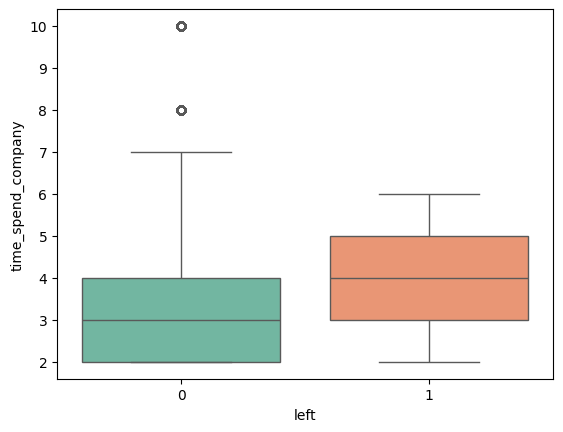

In [46]:
sns.boxplot(x='left', y='time_spend_company', data=df, palette='Set2')

* Employees who spent 4 hours or more have a higher churn rate

#### 3. Examine Correlationship between Features

In [58]:
# Checking for correlationship
numeric_df = df.select_dtypes(include='number').drop(columns=['empid'])
corr_matrix = numeric_df.corr()
corr_matrix


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.104903,-0.143168,-0.020176,-0.100912,0.058653,0.025589,-0.388269
last_evaluation,0.104903,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.143168,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020176,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100912,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.058653,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025589,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388269,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


Based on the correlation matrix you provided, let's analyze the relationships between the `left` column (which indicates whether employees left the company or not) and other numerical features in your dataset:

### Interpretation of Correlation Matrix:

1. **Correlation with `left` column**:
   - `satisfaction_level`: The correlation coefficient is `-0.388269`. This indicates a moderate negative correlation between `satisfaction_level` and `left`. A lower satisfaction level is associated with a higher likelihood of employees leaving.
   
   - `time_spend_company`: The correlation coefficient is `0.144822`. This suggests a weak positive correlation between `time_spend_company` and `left`. Employees who have spent more time at the company are slightly more likely to leave.

   - `number_project`, `average_monthly_hours`, and other features: The correlations are relatively weak (`|r| < 0.1`). This suggests that these factors have minimal linear correlation with whether an employee leaves or not.

2. **Key Insights**:
   - **Satisfaction Level**: The strongest correlation is with `satisfaction_level`, indicating that dissatisfaction plays a significant role in employee churn.
   
   - **Time Spent at Company**: While there is a positive correlation with `time_spend_company`, it's not as strong as satisfaction level, suggesting that longer tenure alone may not be a strong predictor of retention.

3. **Additional Considerations**:
   - **Non-linear Relationships**: Keep in mind that correlations only measure linear relationships. There could be non-linear or interaction effects that are not captured by the correlation coefficients.
   
   - **Further Analysis**: Consider exploring these relationships further with visualizations (e.g., scatter plots, box plots) to understand the distribution and potential thresholds affecting employee churn.

### Conclusion:

Based on the correlation matrix:
- Focus on improving employee satisfaction could potentially reduce churn rates.
- Longer tenure alone does not necessarily mitigate turnover, implying that other factors (such as job satisfaction) may influence retention more significantly.

For a more comprehensive analysis, consider integrating qualitative data (e.g., employee surveys, exit interviews) to complement these quantitative findings and gain deeper insights into the reasons behind employee churn.

<Axes: >

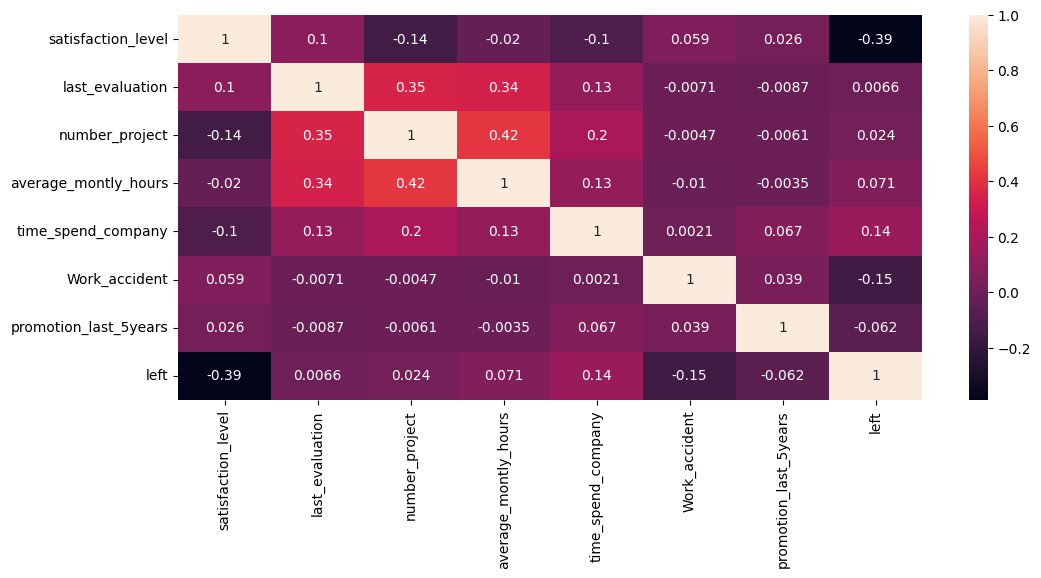

In [59]:
fig=plt.figure(figsize=(12,5))
sns.heatmap(corr_matrix, annot=True)

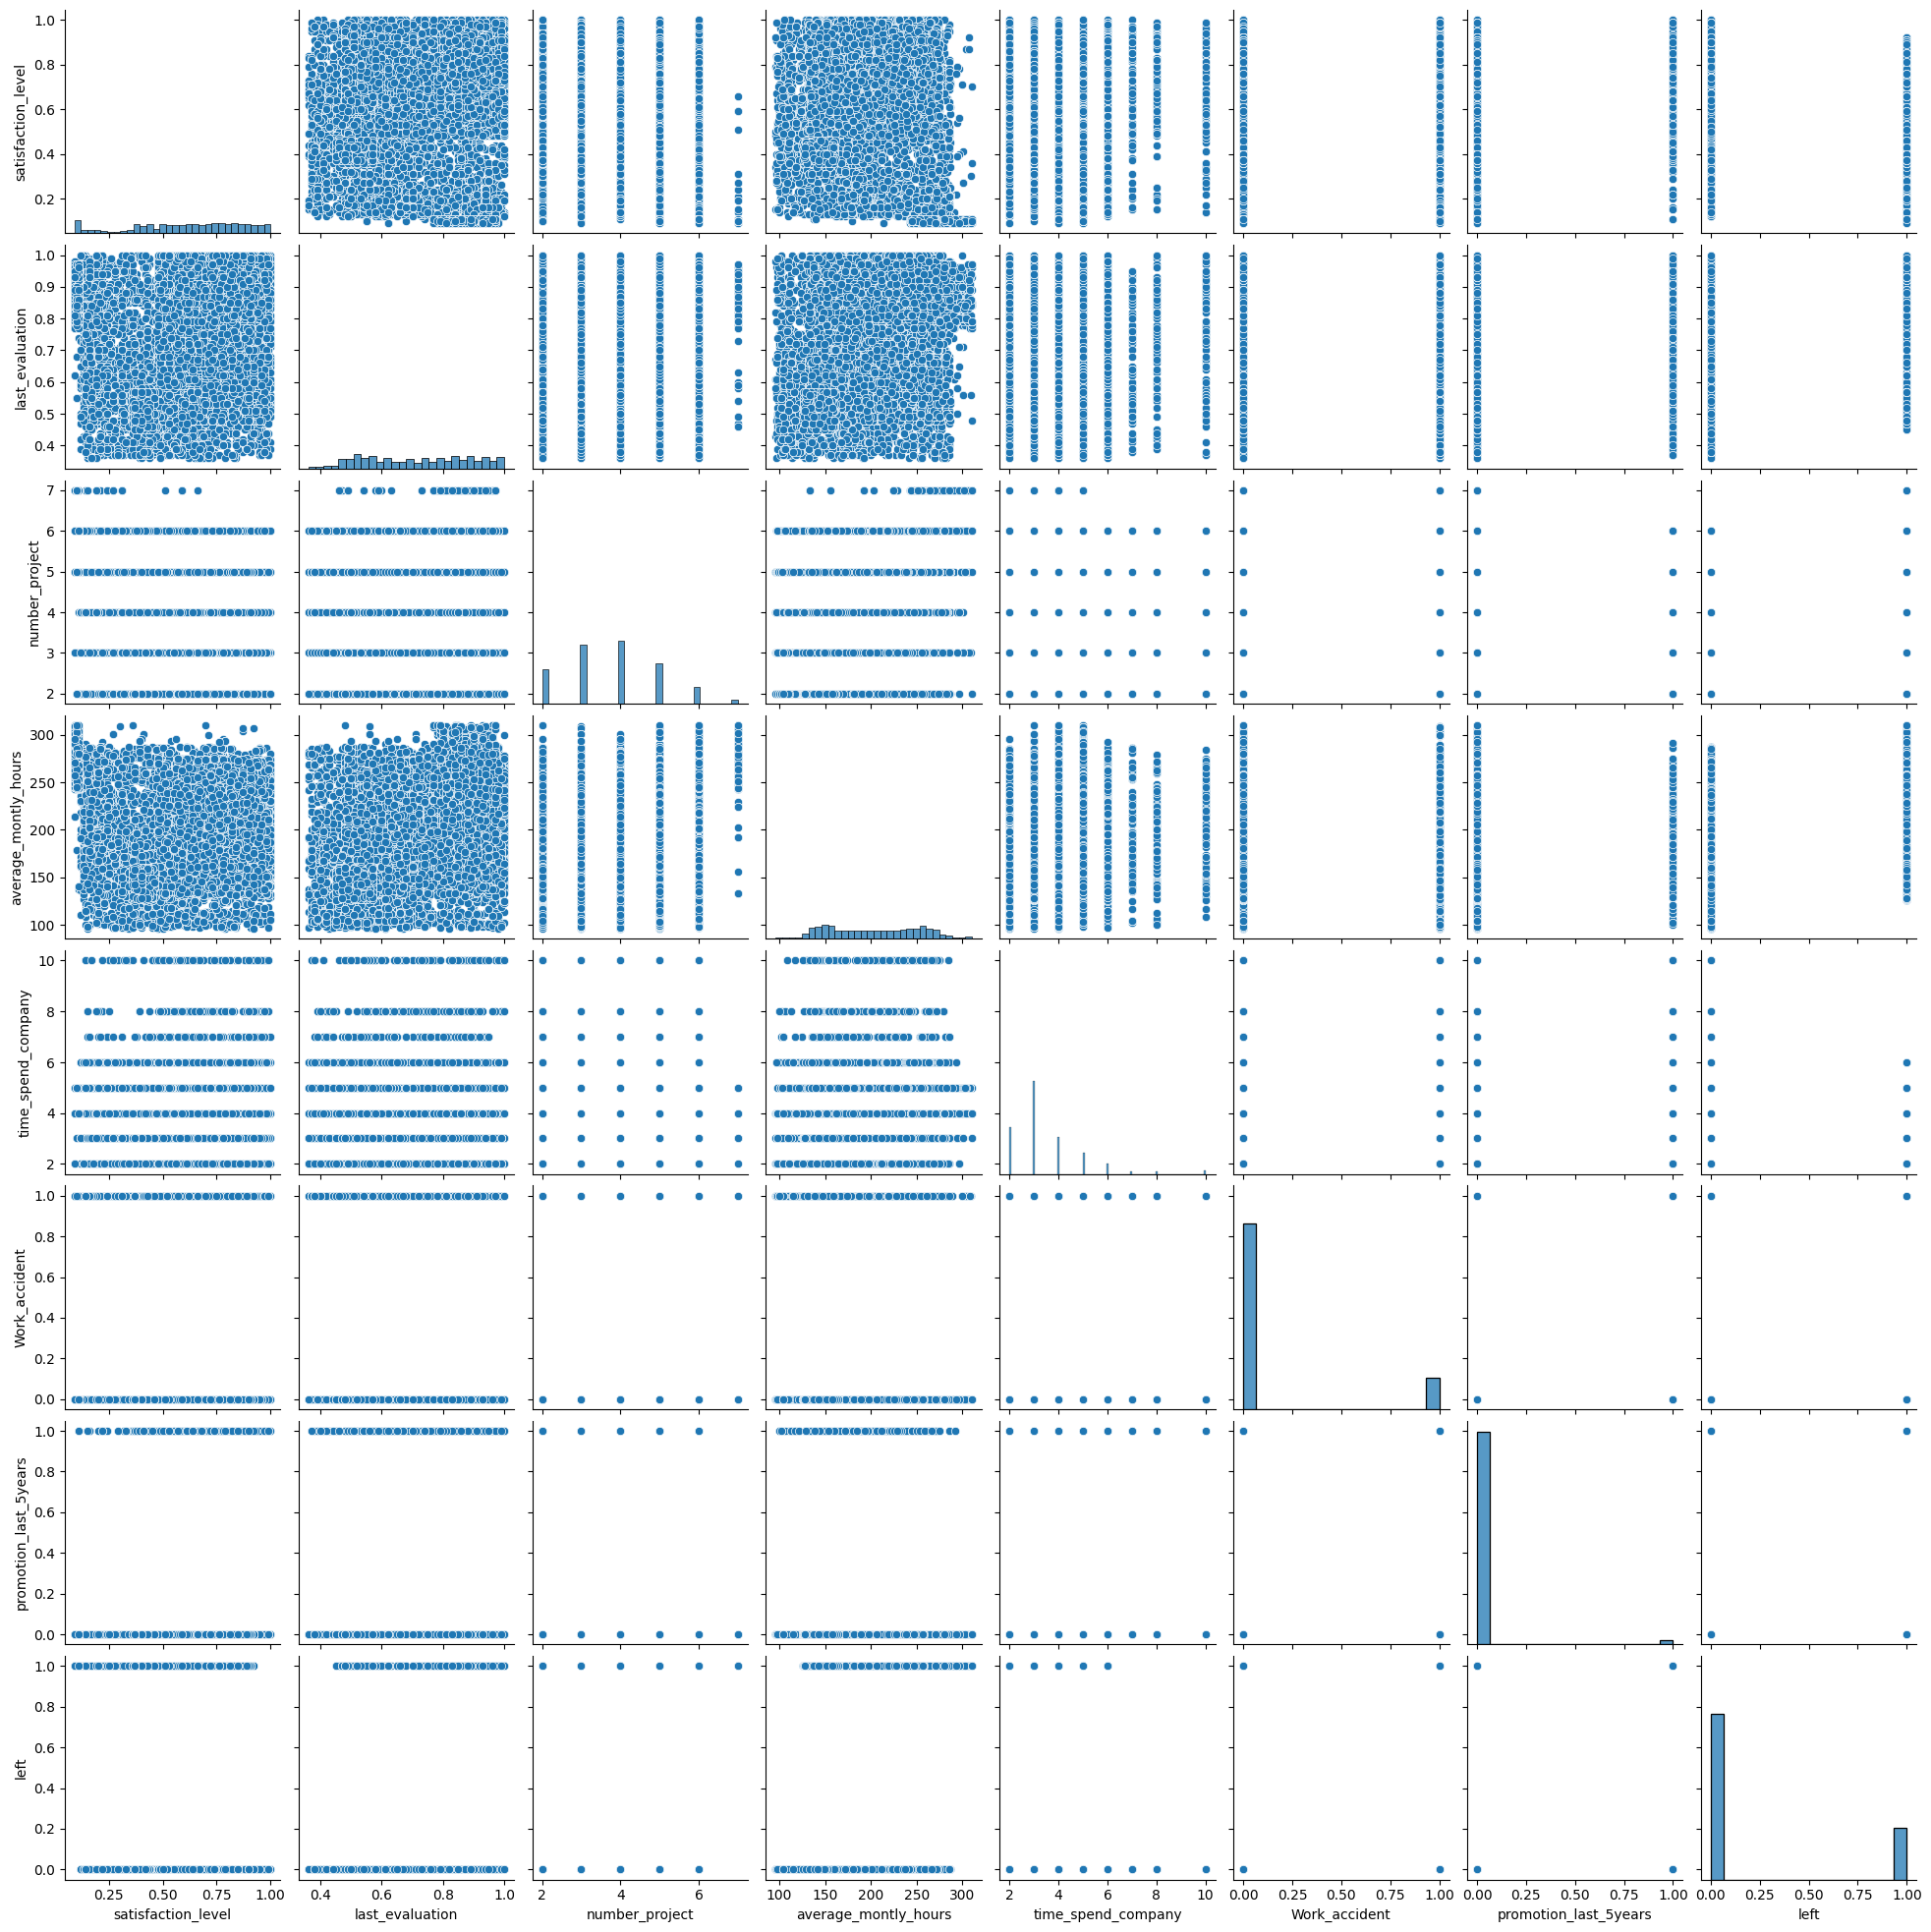

In [61]:
# sns.pairplot() is a function in the Seaborn library used to plot pairwise relationships between 
# variables in a DataFrame. 
# It creates a grid of axes such that each numeric variable in the DataFrame is paired with every other numeric variable, 
# producing scatterplots for joint relationships and histograms for single variable distributions along the diagonal.
clean_df = df.drop(columns=['empid'])
sns.pairplot(clean_df)